In [24]:
from spacerocks.spacerock import SpaceRock, RockCollection
from spacerocks.observing import Observatory, DetectionCatalog
from spacerocks.spice import SpiceKernel
from spacerocks.time import Time
from spacerocks.nbody import Simulation

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

kernel = SpiceKernel()
kernel.load("/Users/kjnapier/data/spice/latest_leapseconds.tls")
kernel.load("/Users/kjnapier/data/spice/de440s.bsp")

In [25]:
N = 1000
epoch = Time.now()

rocks = RockCollection.random(N)
rocks.analytic_propagate(epoch)

planets_names = ["sun", 
                 "jupiter barycenter", 
                 "saturn barycenter", 
                 "uranus barycenter", 
                 "neptune barycenter"]
planets = {name: SpaceRock.from_spice(name, epoch) for name in planets_names}

In [26]:
sim = Simulation()
sim.set_epoch(epoch.epoch)
for planet in planets.values():
    planet.change_frame("ECLIPJ2000")
    sim.add(planet)
    
for rock in rocks:
    sim.add(rock)

sim.move_to_center_of_mass()

In [27]:
epochs = np.linspace(sim.epoch, sim.epoch + 10_000 * 365.25, 1000)

In [28]:
particle_snapshots = []
perturber_snapshots = []

for epoch in epochs:
    sim.integrate(epoch)
    particle_snapshots.append(sim.particles)
    perturber_snapshots.append(sim.perturbers)

In [29]:
x, y, z = [p.x for p in particle_snapshots], [p.y for p in particle_snapshots], [p.z for p in particle_snapshots]
px, py, pz = [p.x for p in perturber_snapshots], [p.y for p in perturber_snapshots], [p.z for p in perturber_snapshots]

Text(0, 0.5, 'y (au)')

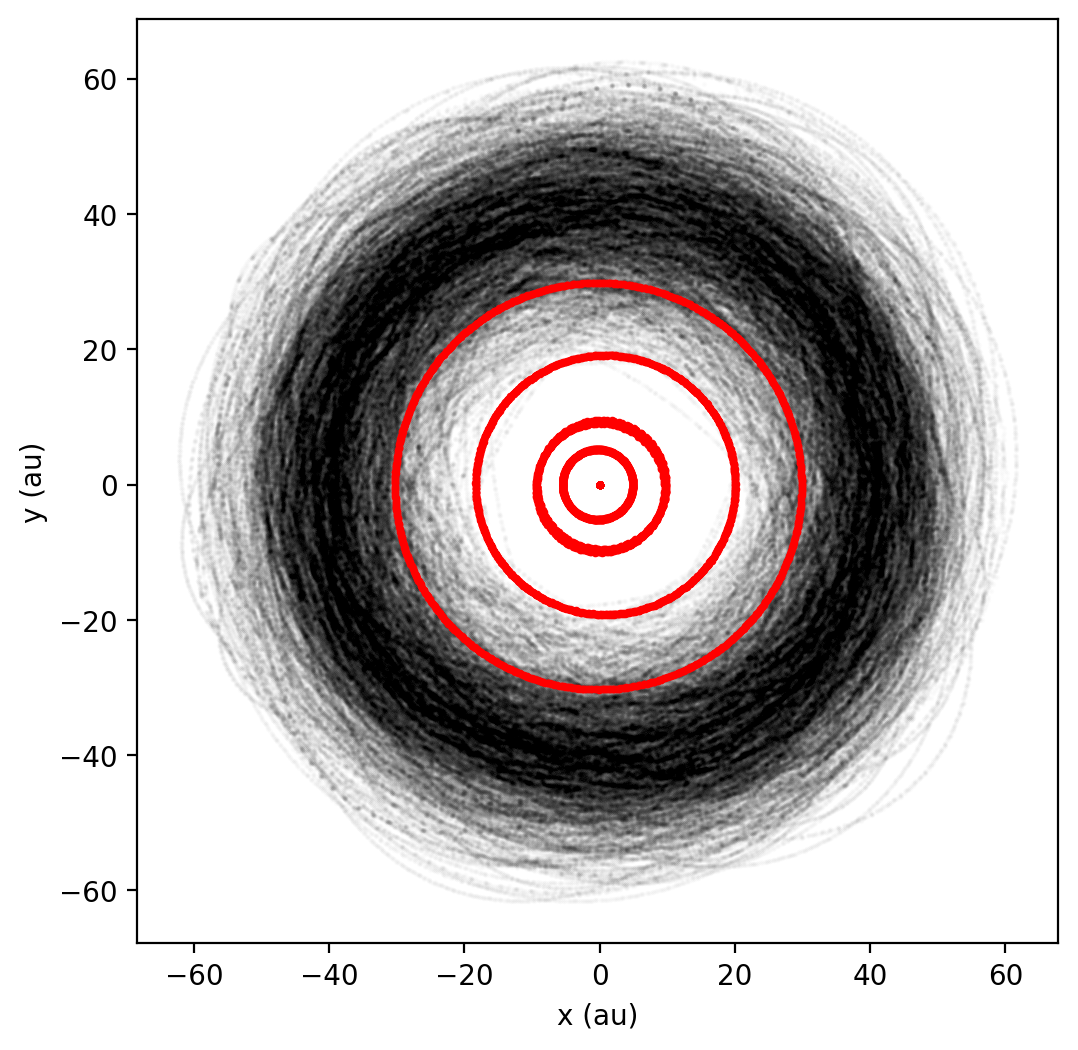

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, y, s=1, alpha=0.01, color='black')
ax.scatter(px, py, s=3, alpha=1, color='red')
ax.set_aspect('equal')
ax.set_xlabel("x (au)")
ax.set_ylabel("y (au)")

In [2]:
o = Observatory.from_coordinates(np.radians(-30.00293494202556), np.radians(-70.80642), 2207.0)

In [3]:
deedee = SpaceRock.from_horizons("2014 UZ224")
arrokoth = SpaceRock.from_horizons("2014 MU69")

epoch = Time.now()

deedee.analytic_propagate(epoch)
arrokoth.analytic_propagate(epoch)

observer = o.at(epoch)

obs_deedee = deedee.observe(observer)
obs_arrokoth = arrokoth.observe(observer)

In [4]:
obs_deedee.calc_altaz()

(-0.2702998466125326, 5.078241289265045)

In [5]:
sim = Simulation()

In [6]:
sim.add(deedee)

In [14]:
rocks = RockCollection()

rocks.add(deedee)
rocks.add(arrokoth)

In [15]:
rocks.analytic_propagate(Time.now())
#rocks.inc

In [16]:
deedee.name

'2014 UZ224'

In [17]:
N = 100_000
rocks = RockCollection.random(N)

In [18]:
epoch = Time.now()
observer = o.at(epoch)

In [19]:
%%time
catalog = rocks.observe(observer)

CPU times: user 151 ms, sys: 25.1 ms, total: 176 ms
Wall time: 23.5 ms


In [20]:
alt, az = catalog.calc_altaz()
alt = np.degrees(alt)

In [21]:
alt, az = catalog.calc_altaz()
alt = np.degrees(alt)

In [22]:
up = alt > 0

(-90.0, 90.0)

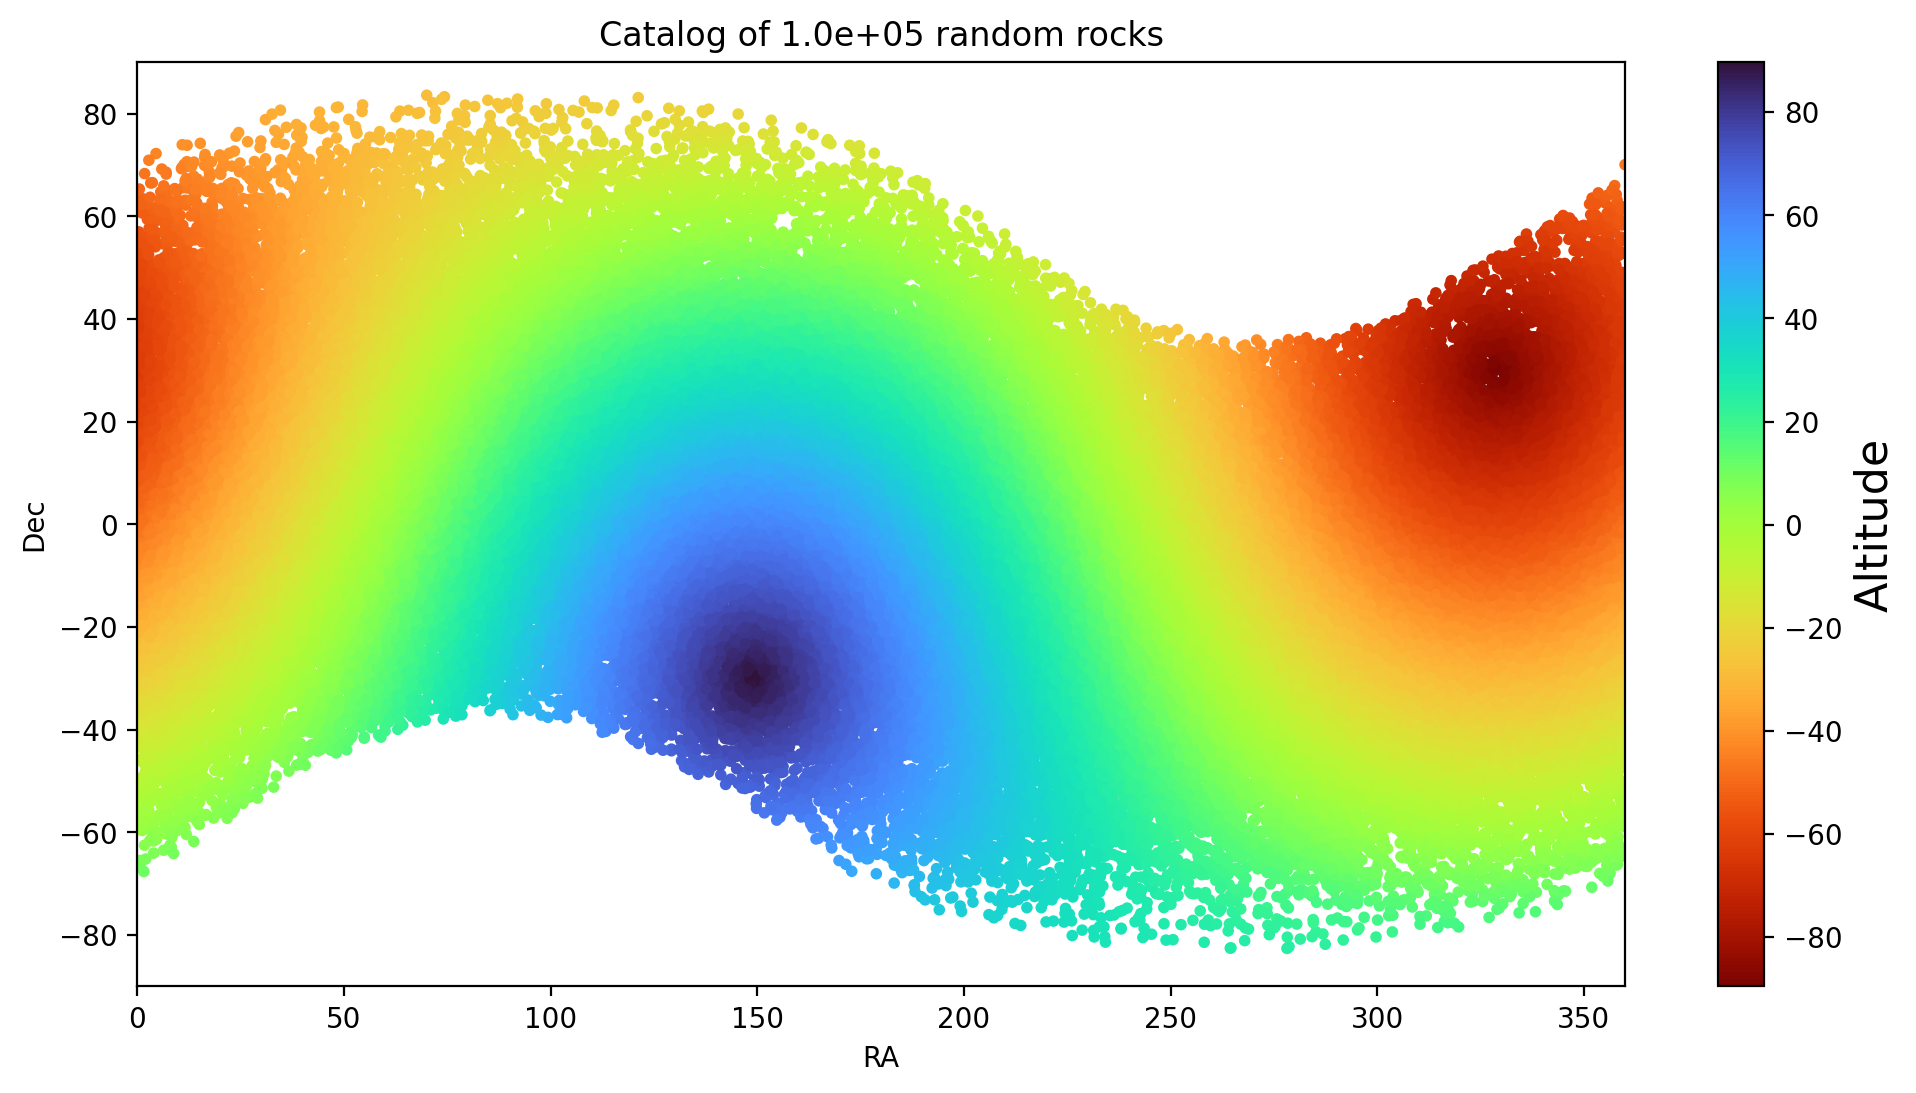

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))

sc = ax.scatter(np.degrees(catalog.ra), np.degrees(catalog.dec), s=10, alpha=1, c=alt, cmap='turbo_r')
cbar = fig.colorbar(sc, label="Altitude")
cbar.set_label("Altitude", fontsize=16)

# change the transparency of the colorbar
cbar.solids.set(alpha=1)


ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.set_title(f"Catalog of {N:.1e} random rocks")
ax.set_xlim(0, 360)
ax.set_ylim(-90, 90)